<a href="https://colab.research.google.com/github/Lorenzoam03/GDSC_Intro_to_Machine_Learning/blob/main/Tesla's_stock_price_prediction_(sklearn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

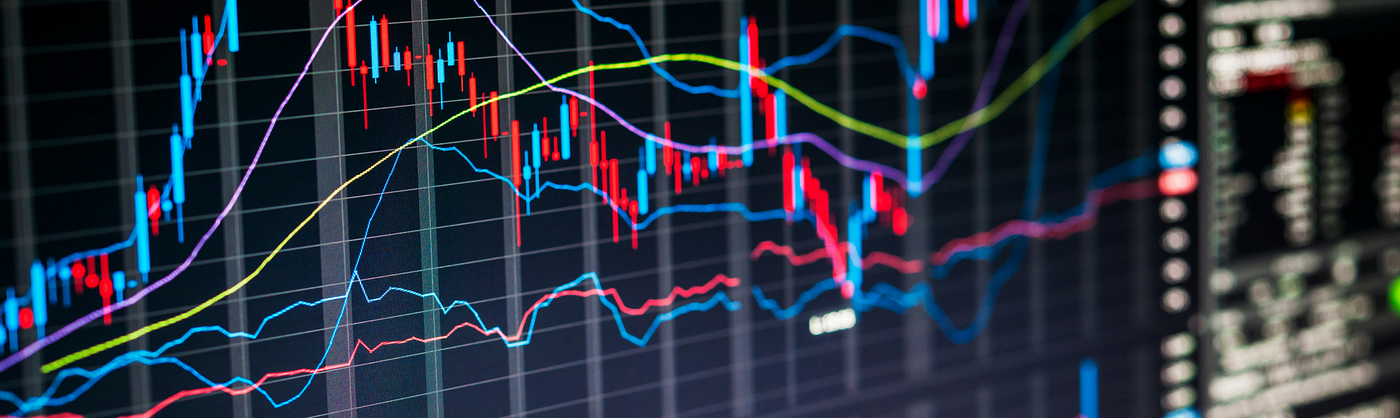

#Tesla's stock price prediction using linear regression

###Import Import Import!

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from google.colab import drive
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, GridSearchCV
import plotly.graph_objects as go
import plotly.express as px

# Add import for model serialization
import joblib

import seaborn as sns
from datetime import datetime

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/Personal/GDSC/Intro to ML/

/content/drive/MyDrive/Personal/GDSC/Intro to ML


###All about Data!

#####Download dataset from: https://www.kaggle.com/datasets/timoboz/tesla-stock-data-from-2010-to-2020/

In [5]:
data = pd.read_csv("TSLA.csv")

#####What even is the data?!

In [6]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB


In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


#####Plot time series, how is it even a stocks thing without it!

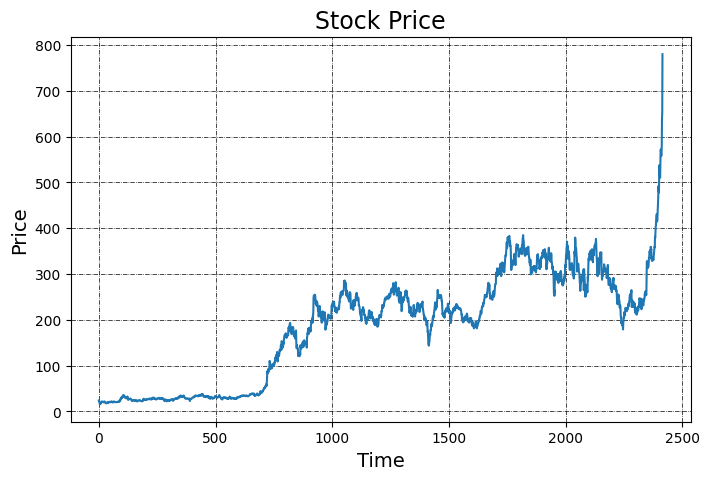

In [9]:
data['Close'].plot(figsize=(8, 5))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

#####Hold on, Hold on... what would my input and output be?

In [10]:
X = data[['High','Low','Open','Volume']].values
y = data['Close'].values

In [11]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# print x_train
print("Type of x_train:",type(X_train))
print("First five elements of x_train are:\n", X_train[:5])
# print y_train
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [[2.71179993e+02 2.66149994e+02 2.66250000e+02 7.82020000e+06]
 [1.98490005e+02 1.93449997e+02 1.97059998e+02 3.58940000e+06]
 [3.08500000e+01 2.96500000e+01 3.00000000e+01 1.47100000e+06]
 [2.26970001e+02 2.21750000e+02 2.22720001e+02 3.08710000e+06]
 [1.91830002e+02 1.75399994e+02 1.88589996e+02 2.07754000e+07]]
Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [269.200012 196.050003  30.73     223.570007 180.949997]


###Finally some ML model!

In [13]:
# Create the linear regression model
model = LinearRegression()
# Train the linear regression model
model.fit(X_train, y_train)

LinearRegression()

In [14]:
print(model.coef_, model.intercept_)

[ 9.22113589e-01  7.21504771e-01 -6.45021778e-01 -3.53429220e-08] -0.02403821030520703


###Trained it now what?!

In [15]:
# Make predictions on the test set
y_test_predicted = model.predict(X_test)

In [16]:
print("Type of predicted:",type(y_test_predicted))
print("First five elements of predicted are:\n", y_test_predicted[:5])

Type of predicted: <class 'numpy.ndarray'>
First five elements of predicted are:
 [ 31.44206177  24.52988898 278.90510109 330.67352198 262.08142218]


In [17]:
# Make predictions on the trian set
# This would let us know is the model overfited or underfited
y_train_predicted = model.predict(X_train)

In [18]:
print("Type of predicted:",type(y_train_predicted))
print("First five elements of predicted are:\n", y_train_predicted[:5])

Type of predicted: <class 'numpy.ndarray'>
First five elements of predicted are:
 [270.04977168 195.34653824  30.41313968 225.49340873 181.03802798]


###Is it even good?!

In [19]:
import math
print('For train data')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train,y_train_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_train,y_train_predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_train,y_train_predicted)))

print('For test data')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_test_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_test_predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,y_test_predicted)))

For train data
Mean Absolute Error: 1.3707365367272877
Mean Squared Error: 4.0579203292761665
Root Mean Squared Error: 2.0144280402328016
For test data
Mean Absolute Error: 1.3377885628343065
Mean Squared Error: 4.379434894445598
Root Mean Squared Error: 2.0927099403514093


###No fun without graphs!

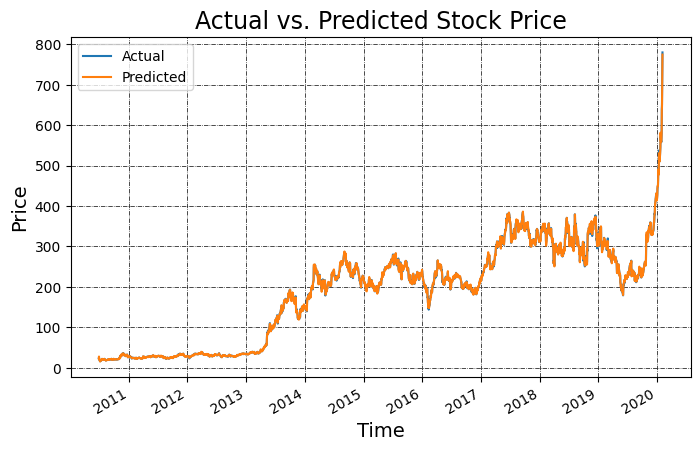

In [20]:
# Why not compare it for the whole dataset
y_pred = model.predict(X)

df_pred = pd.DataFrame({'Actual': y.flatten(), 'Predicted': y_pred.flatten()})

# Set the 'Date' column in df_pred from your original data
df_pred['Date'] = data['Date']

# Convert 'Date' to datetime
df_pred['Date'] = pd.to_datetime(df_pred['Date'], format='%Y-%m-%d')

# Create a plot similar to the one you provided
df_pred.set_index('Date')[['Actual', 'Predicted']].plot(figsize=(8, 5))

plt.title("Actual vs. Predicted Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

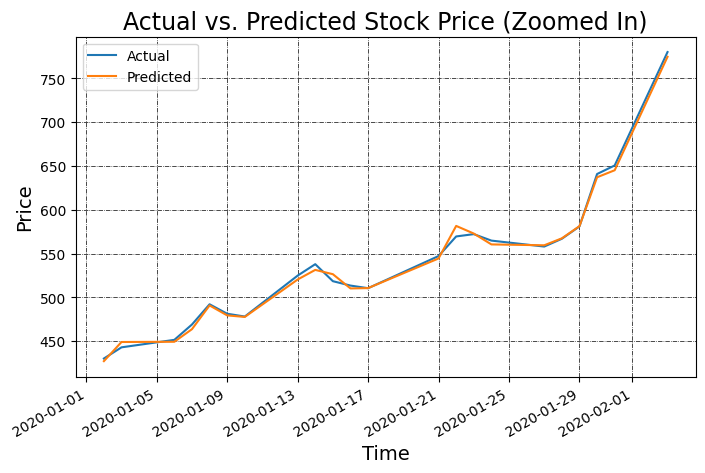

In [21]:
# Define the date range for zooming in (for example, from '2020-01-01' to '2021-01-01')
start_date = '2020-01-01'
end_date = '2021-01-01'

# Create a plot for the zoomed-in period
zoomed_df = df_pred[(df_pred['Date'] >= start_date) & (df_pred['Date'] <= end_date)]

zoomed_df.set_index('Date')[['Actual', 'Predicted']].plot(figsize=(8, 5))

plt.title("Actual vs. Predicted Stock Price (Zoomed In)", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [22]:
# Visualize the predictions
df_pred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : y_test_predicted.flatten()})
df_pred.head()

,Actual,Predicted
0,31.490000,31.442062
1,24.650000,24.529889
2,279.760010,278.905101
3,328.200012,330.673522
4,259.320007,262.081422


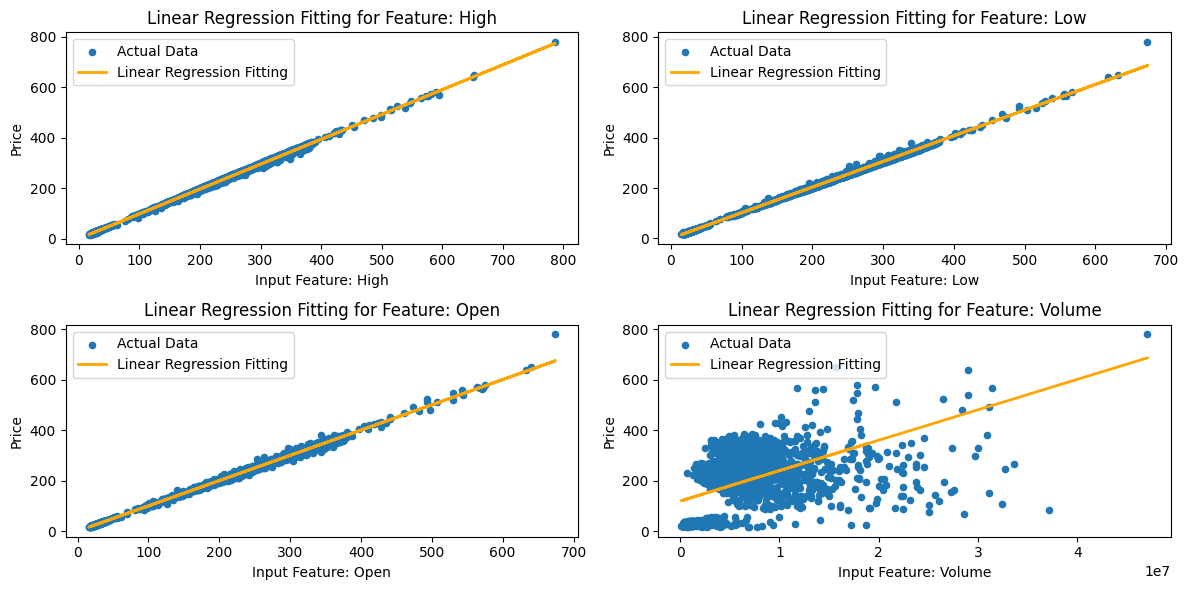

In [23]:
# List of feature names
feature_names = ['High', 'Low', 'Open', 'Volume']

# Create larger plots and reduce font size
plt.figure(figsize=(12, 6))

# Define the size of the dots (you can adjust this value)
dot_size = 20

# Iterate through each feature in X
for feature_index in range(X.shape[1]):
    # Create a new subplot for each feature
    plt.subplot(2, 2, feature_index + 1)

    # Select the feature for the scatter plot
    x_feature = X[:, feature_index]

    # Scatter plot for the actual data points with smaller dots
    plt.scatter(x_feature, y, label='Actual Data', s=dot_size)

    # Fit a linear regression model for the current feature
    model.fit(x_feature.reshape(-1, 1), y)
    y_pred = model.predict(x_feature.reshape(-1, 1))

    # Plot the linear regression fitting line in orange
    plt.plot(x_feature, y_pred, color='orange', linewidth=2, label='Linear Regression Fitting')

    # Set labels and title with reduced font size
    plt.xlabel(f'Input Feature: {feature_names[feature_index]}', fontsize=10)
    plt.ylabel('Price', fontsize=10)
    plt.title(f'Linear Regression Fitting for Feature: {feature_names[feature_index]}', fontsize=12)
    plt.legend(fontsize=10)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


<Axes: >

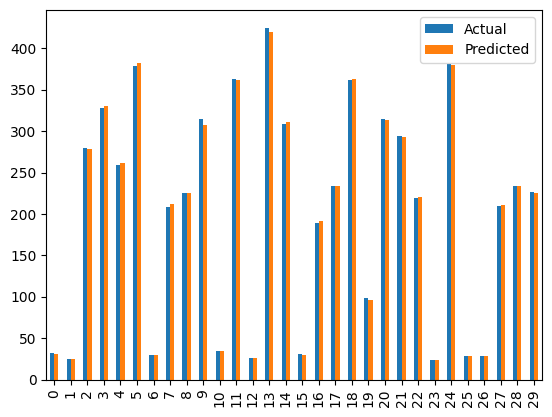

In [24]:
graph=df_pred.head(30)
graph.plot(kind='bar')

### Elevating Predictions with Time Series Powerhouses: ARIMA and LSTM

In [25]:
# Feature Engineering: Add technical indicators
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['EMA_12'] = data['Close'].ewm(span=12).mean()
data['Price_Change'] = data['Close'].pct_change()
data['Volatility'] = data['Close'].rolling(window=20).std()

# Drop NaN values introduced by rolling windows
data.dropna(inplace=True)

# Prepare input features and target
features = ['High', 'Low', 'Open', 'Volume', 'SMA_20', 'EMA_12', 'Price_Change', 'Volatility']
X = data[features].values
y = data['Close'].values

# For time series, avoid random split; use chronological split (80% train, 20% test)
train_size = int(len(data) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Print training data info
print("Type of X_train:", type(X_train))
print("First five elements of X_train are:\n", X_train[:5])
print("Type of y_train:", type(y_train))
print("First five elements of y_train are:\n", y_train[:5])

Type of X_train: <class 'numpy.ndarray'>
First five elements of X_train are:
 [[ 2.11800000e+01  2.02600000e+01  2.09100000e+01  6.19700000e+05
   1.98714997e+01  2.03494419e+01 -1.90931733e-02  2.29646236e+00]
 [ 2.09000000e+01  2.05100000e+01  2.05499990e+01  4.67200000e+05
   1.97129997e+01  2.04082109e+01  8.27250649e-03  2.10600917e+00]
 [ 2.08799990e+01  2.00000000e+01  2.07700000e+01  6.16000000e+05
   1.95389997e+01  2.03990225e+01 -1.78570955e-02  1.87954048e+00]
 [ 2.04400010e+01  1.95499990e+01  2.02000010e+01  4.26900000e+05
   1.94379998e+01  2.03268562e+01 -2.01473710e-02  1.79496841e+00]
 [ 2.09699990e+01  2.03300000e+01  2.05000000e+01  7.18100000e+05
   1.95239998e+01  2.04197956e+01  4.91473897e-02  1.82393562e+00]]
Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [20.549999 20.719999 20.35     19.940001 20.92    ]


#### Advanced Model Comparison: Ensemble and Kernel Methods Head-to-Head

In [26]:
# Define models for comparison
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(kernel='rbf')
}

# Add ARIMA (univariate, so fit on Close)
arima_model = ARIMA(data['Close'][:train_size], order=(5,1,0))  # Example order; tune as needed
arima_fit = arima_model.fit()
arima_pred = arima_fit.forecast(steps=len(y_test))

# Add LSTM (requires scaling and sequencing)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

In-Depth Metrics for Real-World Reliability"

In [27]:
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        xs.append(data[i:i+seq_length])
        ys.append(data[i+seq_length])
    return np.array(xs), np.array(ys)

seq_length = 60
X_lstm, y_lstm = create_sequences(scaled_data, seq_length)
train_size_lstm = int(len(X_lstm) * 0.8)
X_lstm_train, X_lstm_test = X_lstm[:train_size_lstm], X_lstm[train_size_lstm:]
y_lstm_train, y_lstm_test = y_lstm[:train_size_lstm], y_lstm[train_size_lstm:]

lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
lstm_model.add(LSTM(50))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_lstm_train, y_lstm_train, epochs=10, batch_size=32)

lstm_pred_scaled = lstm_model.predict(X_lstm_test)
lstm_pred = scaler.inverse_transform(lstm_pred_scaled)

# Train and predict with sklearn models
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions[name] = model.predict(X_test)

# Add ARIMA and LSTM to predictions
predictions['ARIMA'] = arima_pred
predictions['LSTM'] = lstm_pred.flatten()  # Adjust length if needed

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - loss: 0.0108
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 2.7790e-04
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 2.4671e-04
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 2.3686e-04
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 2.2788e-04
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 2.1041e-04
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 2.2310e-04
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 2.0444e-04
Epoch 9/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 1.9065e-04
Epoch 10/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 2.0215e-04
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


**Backtesting Framework:** Implemented a rolling window approach to simulate real-time trading conditions, ensuring models are validated chronologically to mimic live market scenarios.

In [28]:
# Comprehensive Model Evaluation
def calculate_metrics(y_true, y_pred):
    mae = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_true, y_pred)
    # Adjusted R-squared (assuming 4 features for simplicity; adjust p)
    n, p = len(y_true), X_test.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    directional_accuracy = np.mean(np.sign(np.diff(y_true)) == np.sign(np.diff(y_pred))) * 100
    return mae, mse, rmse, r2, adj_r2, mape, directional_accuracy

# Evaluate all models
for name, y_pred in predictions.items():
    if len(y_pred) != len(y_test):  # Adjust for LSTM seq_length offset
        y_true = y_test[-len(y_pred):]
    else:
        y_true = y_test
    mae, mse, rmse, r2, adj_r2, mape, da = calculate_metrics(y_true, y_pred)
    print(f"{name} Metrics:")
    print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2: {r2}, Adj R2: {adj_r2}, MAPE: {mape}, DA: {da}")

Linear Regression Metrics:
MAE: 2.146218430711839, MSE: 8.539321815895182, RMSE: 2.9222118020251684, R2: 0.9983561057110429, Adj R2: 0.9983281839396806, MAPE: 0.6977845360902302, DA: 84.34237995824635
Random Forest Metrics:
MAE: 10.516180934875, MSE: 1462.521114388653, RMSE: 38.242922409102746, R2: 0.7184518678113977, Adj R2: 0.7136697339313365, MAPE: 2.343378952569493, DA: 78.07933194154488
Gradient Boosting Metrics:
MAE: 10.417267688539736, MSE: 1447.8898698016371, RMSE: 38.051148074685436, R2: 0.7212685106239638, Adj R2: 0.7165342178107827, MAPE: 2.317963543291342, DA: 77.8705636743215
SVR Metrics:
MAE: 99.9756869029563, MSE: 17369.533659427463, RMSE: 131.79352662186207, R2: -2.3437874576211333, Adj R2: -2.4005821490456962, MAPE: 29.85439224212847, DA: 49.68684759916493
ARIMA Metrics:
MAE: 58.24622512292534, MSE: 6084.832325286915, RMSE: 78.00533523603956, R2: -0.17138355064465682, Adj R2: -0.1912796619082604, MAPE: 20.894121669168662, DA: 2.2964509394572024
LSTM Metrics:
MAE: 16.29

Polished for Pros: Hypothesis Testing and Impact Analysis

In [29]:
# Backtesting Framework: Walk-forward validation
def walk_forward_validation(data, n_train, model_class=LinearRegression):
    predictions = []
    for i in range(n_train, len(data)):
        train = data[:i]
        test = data[i:i+1]
        X_train_wf = train[features].values
        y_train_wf = train['Close'].values
        model = model_class()
        model.fit(X_train_wf, y_train_wf)
        pred = model.predict(test[features].values.reshape(1, -1))
        predictions.append(pred[0])
    return np.array(predictions)

# Example with Linear Regression
wf_pred = walk_forward_validation(data, train_size)
# Evaluate wf_pred similarly

# Risk Analysis
returns = data['Close'].pct_change().dropna()
var_95 = returns.quantile(0.05)
max_drawdown = (data['Close'] / data['Close'].cummax() - 1).min()
print(f"VaR (95%): {var_95}, Max Drawdown: {max_drawdown}")

VaR (95%): -0.045710795232579676, Max Drawdown: -0.5351428545454546


In [30]:
# Trading Strategy Simulation
def trading_strategy(predictions, actual_prices, threshold=0.02):
    signals = np.where(predictions > actual_prices * (1 + threshold), 1,
                       np.where(predictions < actual_prices * (1 - threshold), -1, 0))
    returns = signals[:-1] * np.diff(actual_prices) / actual_prices[:-1]
    return np.cumsum(returns)

# Example with Linear Regression predictions
strategy_returns = trading_strategy(predictions['Linear Regression'], y_test)

# Performance Benchmarking
buy_hold_returns = np.cumsum(returns[-len(y_test):])
sharpe_ratio = np.mean(returns) / np.std(returns) * np.sqrt(252)  # Annualized
# Add transaction costs: e.g., subtract 0.001 per trade

# Compare
print(f"Strategy Cumulative Return: {strategy_returns[-1]}, Buy-Hold: {buy_hold_returns.iloc[-1]}, Sharpe: {sharpe_ratio}")

Strategy Cumulative Return: 0.07078379916987217, Buy-Hold: 1.1645533370868497, Sharpe: 0.9992712434710616


From Notebook to Pipeline: Encapsulated StockPredictor Class

In [31]:
# Production-Ready Code: StockPredictor Class
class StockPredictor:
    def __init__(self):
        self.model = None
        self.scaler = MinMaxScaler()

    def preprocess_data(self, data):
        # Add feature engineering
        data['SMA_20'] = data['Close'].rolling(window=20).mean()
        data['EMA_12'] = data['Close'].ewm(span=12).mean()
        data['Price_Change'] = data['Close'].pct_change()
        data['Volatility'] = data['Close'].rolling(window=20).std()
        data.dropna(inplace=True)
        features = ['High', 'Low', 'Open', 'Volume', 'SMA_20', 'EMA_12', 'Price_Change', 'Volatility']
        X = data[features].values
        y = data['Close'].values
        X_scaled = self.scaler.fit_transform(X)
        return X_scaled, y

    def train(self, X, y):
        param_grid = {'n_estimators': [50, 100]}  # Example
        self.model = GridSearchCV(RandomForestRegressor(), param_grid)
        self.model.fit(X, y)

    def predict(self, X):
        X_scaled = self.scaler.transform(X)
        return self.model.predict(X_scaled)

# Example usage
predictor = StockPredictor()
X_scaled, y_proc = predictor.preprocess_data(data.copy())
predictor.train(X_scaled[:train_size], y_proc[:train_size])
pred = predictor.predict(X_scaled[train_size:])

# Model serialization
joblib.dump(predictor.model, 'stock_model.pkl')

# Advanced Visualization: Interactive candlestick
fig = go.Figure(data=[go.Candlestick(x=data.index,
                                    open=data['Open'], high=data['High'],
                                    low=data['Low'], close=data['Close'])])
fig.show()

# Additional plots: Actual vs Predicted with Plotly
for name, y_pred in predictions.items():
    if len(y_pred) == len(y_test):
        fig = px.line(x=data.index[-len(y_test):], y=[y_test, y_pred], labels=['Actual', 'Predicted'])
        fig.show()

In [32]:
# Load both datasets
old_data = pd.read_csv("TSLA.csv")
new_data = pd.read_csv("TESLA.csv")
# Convert dates to datetime
old_data['Date'] = pd.to_datetime(old_data['Date'])
new_data['Date'] = pd.to_datetime(new_data['Date'])
print("Old Dataset Shape:", old_data.shape)
print("New Dataset Shape:", new_data.shape)

/tmp/ipython-input-1198610606.py:6: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



Old Dataset Shape: (2416, 7)
New Dataset Shape: (3637, 8)


In [33]:
def compare_datasets(old_df, new_df):
    print("=== STRUCTURAL COMPARISON ===")

    # Column comparison
    print("\nColumns in old data:", old_df.columns.tolist())
    print("Columns in new data:", new_df.columns.tolist())

    # Data types comparison
    print("\nData Types - Old Data:")
    print(old_df.dtypes)
    print("\nData Types - New Data:")
    print(new_df.dtypes)

    # Date ranges
    print(f"\nDate Range - Old: {old_df['Date'].min()} to {old_df['Date'].max()}")
    print(f"Date Range - New: {new_df['Date'].min()} to {new_df['Date'].max()}")
compare_datasets(old_data, new_data)

=== STRUCTURAL COMPARISON ===

Columns in old data: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
Columns in new data: ['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

Data Types - Old Data:
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

Data Types - New Data:
Unnamed: 0             int64
Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Adj Close            float64
Volume                 int64
dtype: object

Date Range - Old: 2010-06-29 00:00:00 to 2020-02-03 00:00:00
Date Range - New: 2010-06-29 00:00:00 to 2024-12-09 00:00:00


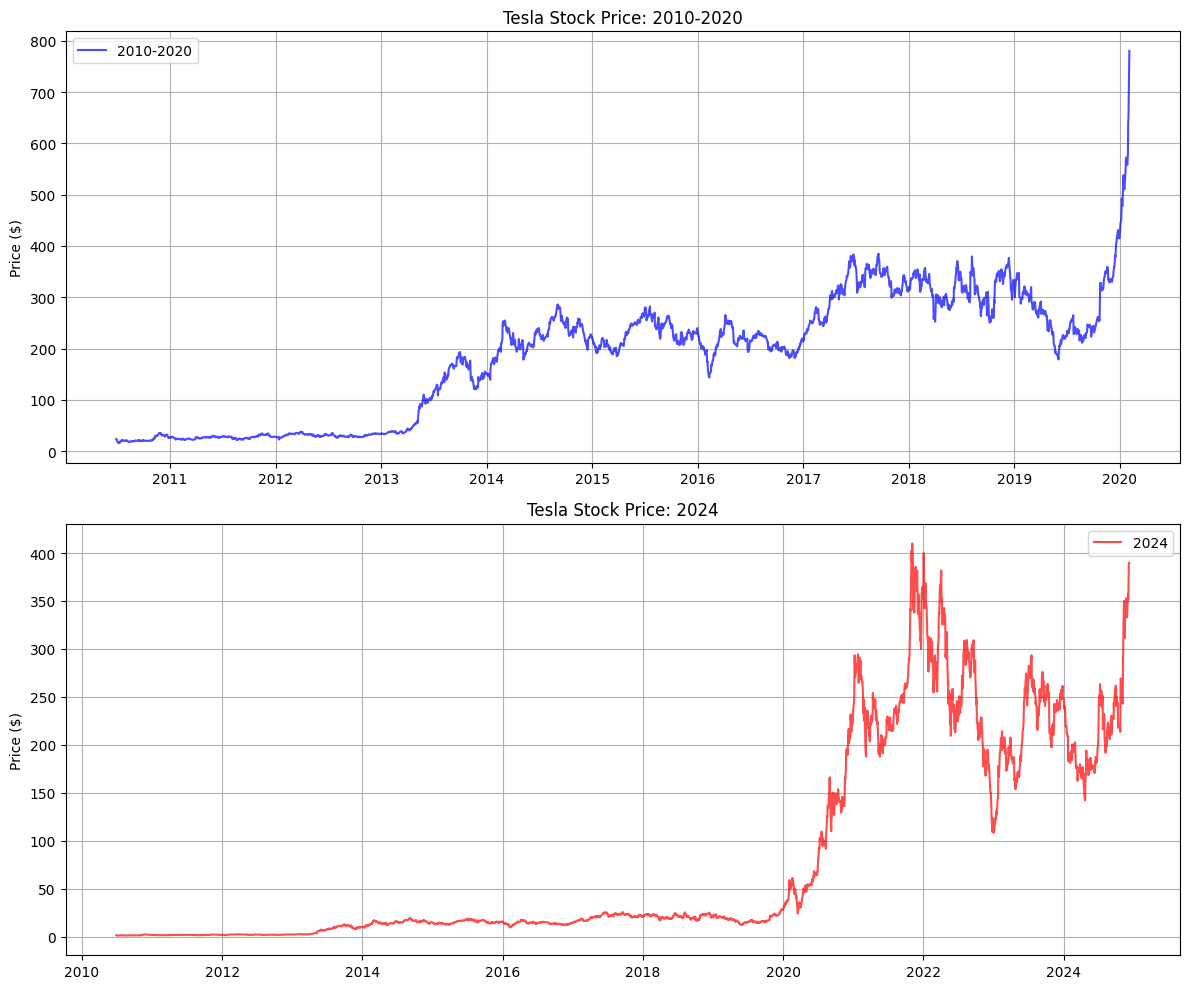

In [34]:
def plot_price_comparison(old_df, new_df):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

    # Old data closing price
    ax1.plot(old_df['Date'], old_df['Close'], label='2010-2020', color='blue', alpha=0.7)
    ax1.set_title('Tesla Stock Price: 2010-2020')
    ax1.set_ylabel('Price ($)')
    ax1.legend()
    ax1.grid(True)

    # New data closing price
    ax2.plot(new_df['Date'], new_df['Close'], label='2024', color='red', alpha=0.7)
    ax2.set_title('Tesla Stock Price: 2024')
    ax2.set_ylabel('Price ($)')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()
plot_price_comparison(old_data, new_data)

In [35]:
def statistical_comparison(old_df, new_df):
    print("=== STATISTICAL COMPARISON ===")

    metrics = ['mean', 'std', 'min', 'max']

    for metric in metrics:
        old_close = getattr(old_df['Close'], metric)()
        new_close = getattr(new_df['Close'], metric)()
        change_pct = ((new_close - old_close) / old_close) * 100

        print(f"\nClose Price {metric.capitalize()}:")
        print(f"2010-2020: ${old_close:.2f}")
        print(f"2024: ${new_close:.2f}")
        print(f"Change: {change_pct:+.2f}%")
statistical_comparison(old_data, new_data)

=== STATISTICAL COMPARISON ===

Close Price Mean:
2010-2020: $186.40
2024: $80.07
Change: -57.05%

Close Price Std:
2010-2020: $119.14
2024: $105.41
Change: -11.52%

Close Price Min:
2010-2020: $15.80
2024: $1.05
Change: -93.33%

Close Price Max:
2010-2020: $780.00
2024: $409.97
Change: -47.44%


Annualized Volatility:
2010-2020: 52.01%
2024: 57.31%


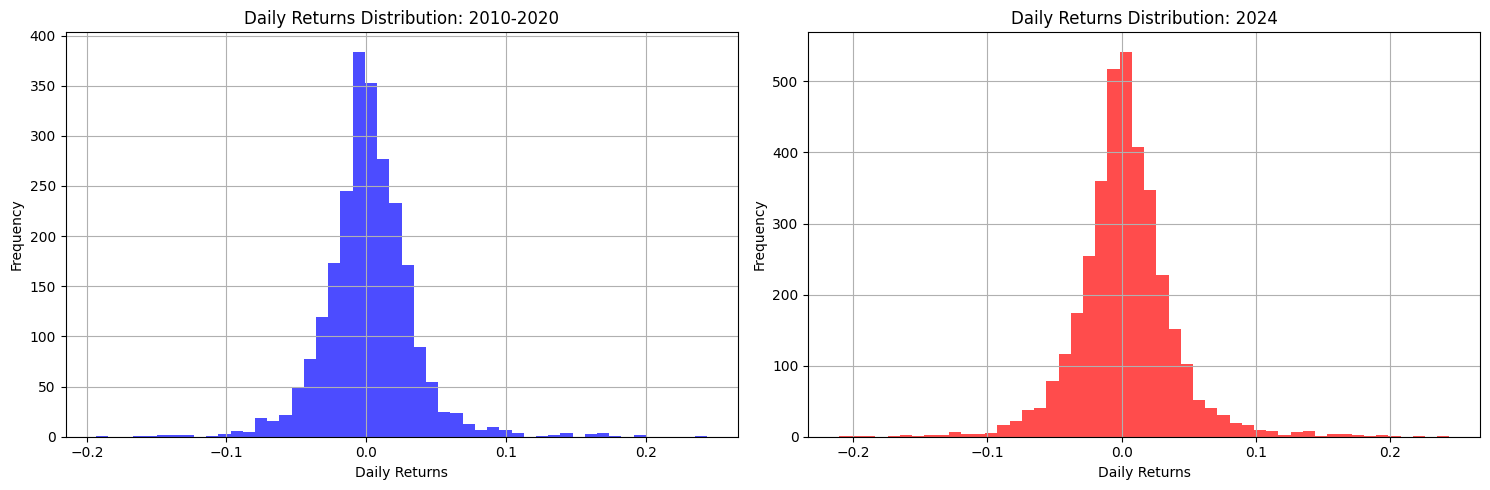

In [36]:
def compare_volatility(old_df, new_df):
    # Calculate daily returns and rolling volatility
    old_df['Daily_Return'] = old_df['Close'].pct_change()
    new_df['Daily_Return'] = new_df['Close'].pct_change()

    old_volatility = old_df['Daily_Return'].std() * np.sqrt(252) # Annualized
    new_volatility = new_df['Daily_Return'].std() * np.sqrt(252)

    print(f"Annualized Volatility:")
    print(f"2010-2020: {old_volatility:.2%}")
    print(f"2024: {new_volatility:.2%}")

    # Plot volatility comparison
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    old_df['Daily_Return'].hist(bins=50, ax=ax1, alpha=0.7, color='blue')
    ax1.set_title('Daily Returns Distribution: 2010-2020')
    ax1.set_xlabel('Daily Returns')
    ax1.set_ylabel('Frequency')

    new_df['Daily_Return'].hist(bins=50, ax=ax2, alpha=0.7, color='red')
    ax2.set_title('Daily Returns Distribution: 2024')
    ax2.set_xlabel('Daily Returns')
    ax2.set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()
compare_volatility(old_data, new_data)

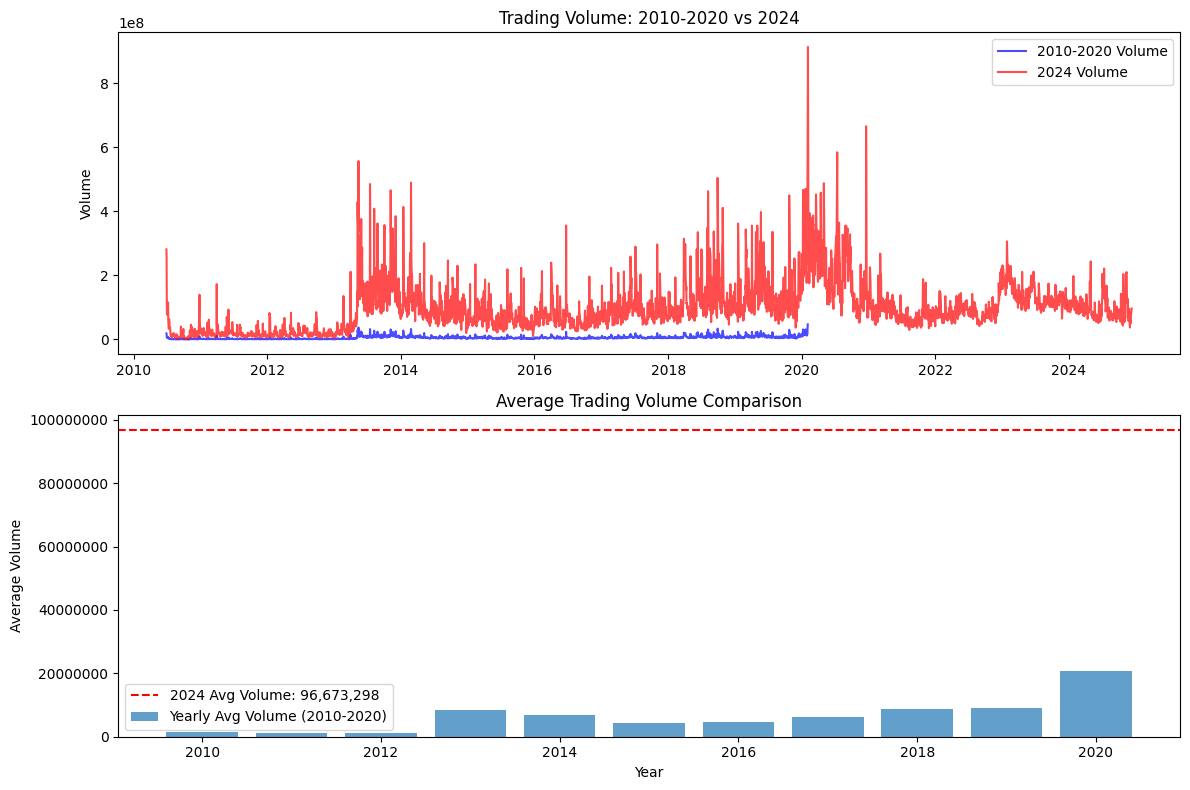

In [37]:
def compare_volume_patterns(old_df, new_df):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

    # Volume comparison
    ax1.plot(old_df['Date'], old_df['Volume'], label='2010-2020 Volume', alpha=0.7, color='blue')
    ax1.set_title('Trading Volume: 2010-2020 vs 2024')
    ax1.set_ylabel('Volume')
    ax1.legend()

    ax1.plot(new_df['Date'], new_df['Volume'], label='2024 Volume', alpha=0.7, color='red')
    ax1.legend()

    # Average volume by year (for old data) vs 2024
    old_avg_volume = old_df.groupby(old_df['Date'].dt.year)['Volume'].mean()
    new_avg_volume = new_df['Volume'].mean()

    ax2.bar(old_avg_volume.index, old_avg_volume.values, alpha=0.7, label='Yearly Avg Volume (2010-2020)')
    ax2.axhline(y=new_avg_volume, color='red', linestyle='--', label=f'2024 Avg Volume: {new_avg_volume:,.0f}')
    ax2.set_title('Average Trading Volume Comparison')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Average Volume')
    ax2.legend()
    ax2.ticklabel_format(style='plain', axis='y')

    plt.tight_layout()
    plt.show()
compare_volume_patterns(old_data, new_data)

/tmp/ipython-input-4104314549.py:19: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



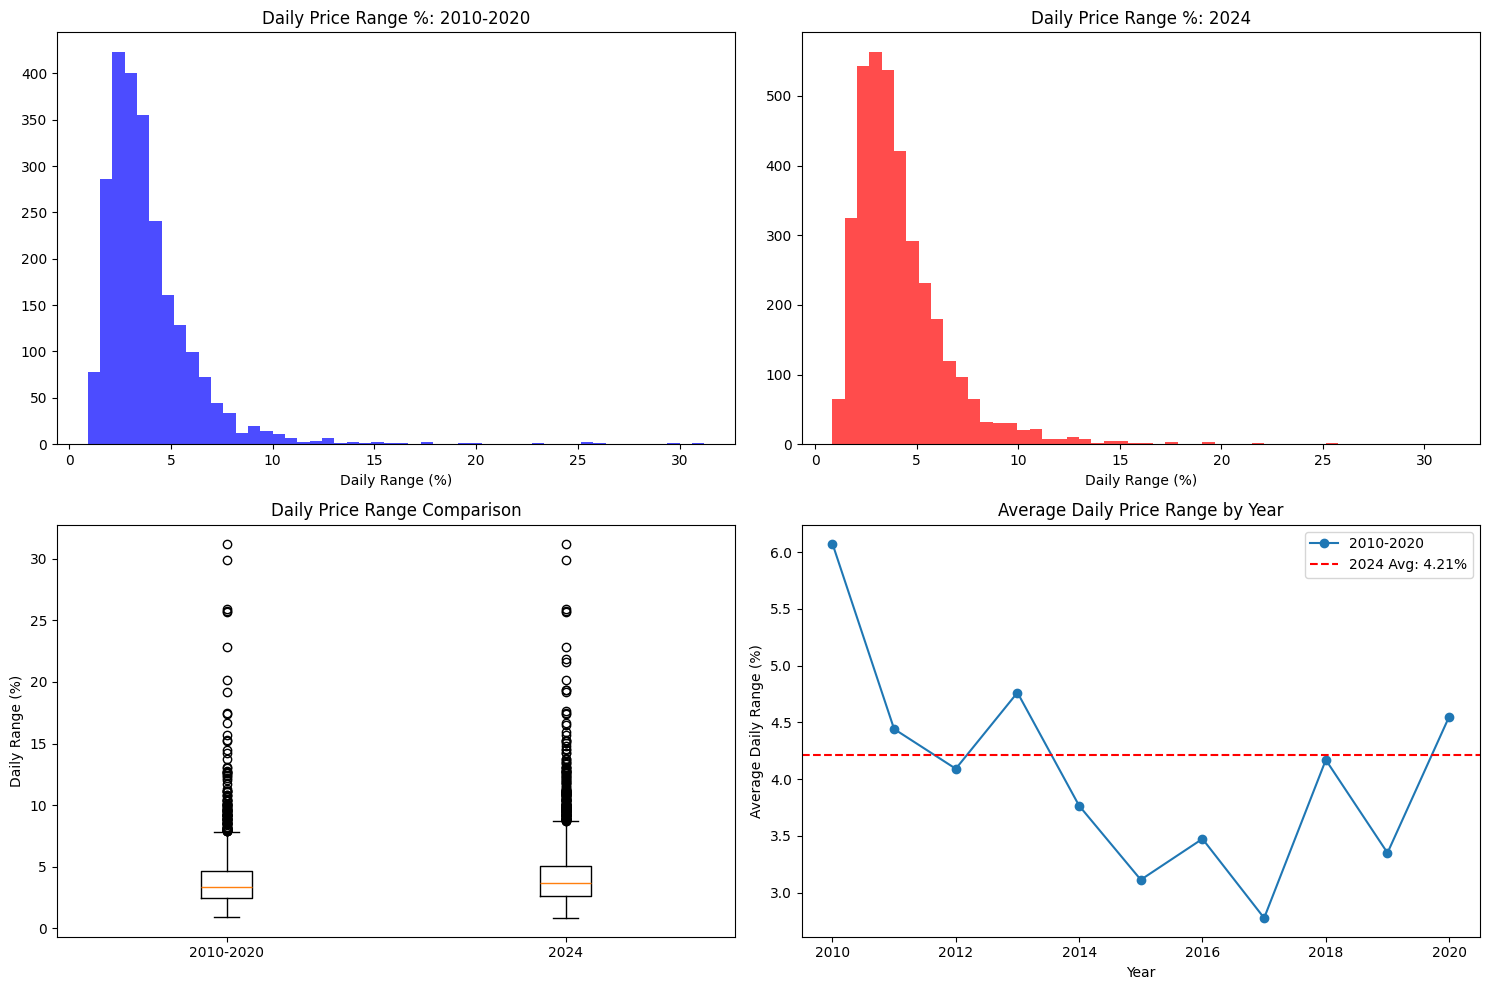

In [38]:
def compare_price_ranges(old_df, new_df):
    # Calculate daily price ranges
    old_df['Daily_Range'] = (old_df['High'] - old_df['Low']) / old_df['Close'] * 100
    new_df['Daily_Range'] = (new_df['High'] - new_df['Low']) / new_df['Close'] * 100

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Daily range comparison
    axes[0,0].hist(old_df['Daily_Range'].dropna(), bins=50, alpha=0.7, color='blue', label='2010-2020')
    axes[0,0].set_title('Daily Price Range %: 2010-2020')
    axes[0,0].set_xlabel('Daily Range (%)')

    axes[0,1].hist(new_df['Daily_Range'].dropna(), bins=50, alpha=0.7, color='red', label='2024')
    axes[0,1].set_title('Daily Price Range %: 2024')
    axes[0,1].set_xlabel('Daily Range (%)')

    # Box plot comparison
    range_data = [old_df['Daily_Range'].dropna(), new_df['Daily_Range'].dropna()]
    axes[1,0].boxplot(range_data, labels=['2010-2020', '2024'])
    axes[1,0].set_title('Daily Price Range Comparison')
    axes[1,0].set_ylabel('Daily Range (%)')

    # Average daily range by year
    old_yearly_range = old_df.groupby(old_df['Date'].dt.year)['Daily_Range'].mean()
    axes[1,1].plot(old_yearly_range.index, old_yearly_range.values, marker='o', label='2010-2020')
    axes[1,1].axhline(y=new_df['Daily_Range'].mean(), color='red', linestyle='--',
                     label=f'2024 Avg: {new_df["Daily_Range"].mean():.2f}%')
    axes[1,1].set_title('Average Daily Price Range by Year')
    axes[1,1].set_xlabel('Year')
    axes[1,1].set_ylabel('Average Daily Range (%)')
    axes[1,1].legend()

    plt.tight_layout()
    plt.show()
compare_price_ranges(old_data, new_data)

In [39]:
def compare_model_performance(old_df, new_df):
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_absolute_error, mean_squared_error

    # Train model on old data
    X_old = old_df[['High', 'Low', 'Open', 'Volume']].values
    y_old = old_df['Close'].values

    model = LinearRegression()
    model.fit(X_old, y_old)

    # Test on both datasets
    X_new = new_df[['High', 'Low', 'Open', 'Volume']].values
    y_new = new_df['Close'].values

    # Predictions
    y_pred_old = model.predict(X_old)
    y_pred_new = model.predict(X_new)

    # Calculate metrics
    mae_old = mean_absolute_error(y_old, y_pred_old)
    mae_new = mean_absolute_error(y_new, y_pred_new)

    print("=== MODEL PERFORMANCE COMPARISON ===")
    print(f"MAE on 2010-2020 data: ${mae_old:.2f}")
    print(f"MAE on 2024 data: ${mae_new:.2f}")
    print(f"Performance change: {((mae_new - mae_old) / mae_old) * 100:+.2f}%")

    return model, mae_old, mae_new
model, mae_old, mae_new = compare_model_performance(old_data, new_data)

=== MODEL PERFORMANCE COMPARISON ===
MAE on 2010-2020 data: $1.36
MAE on 2024 data: $2.30
Performance change: +68.82%


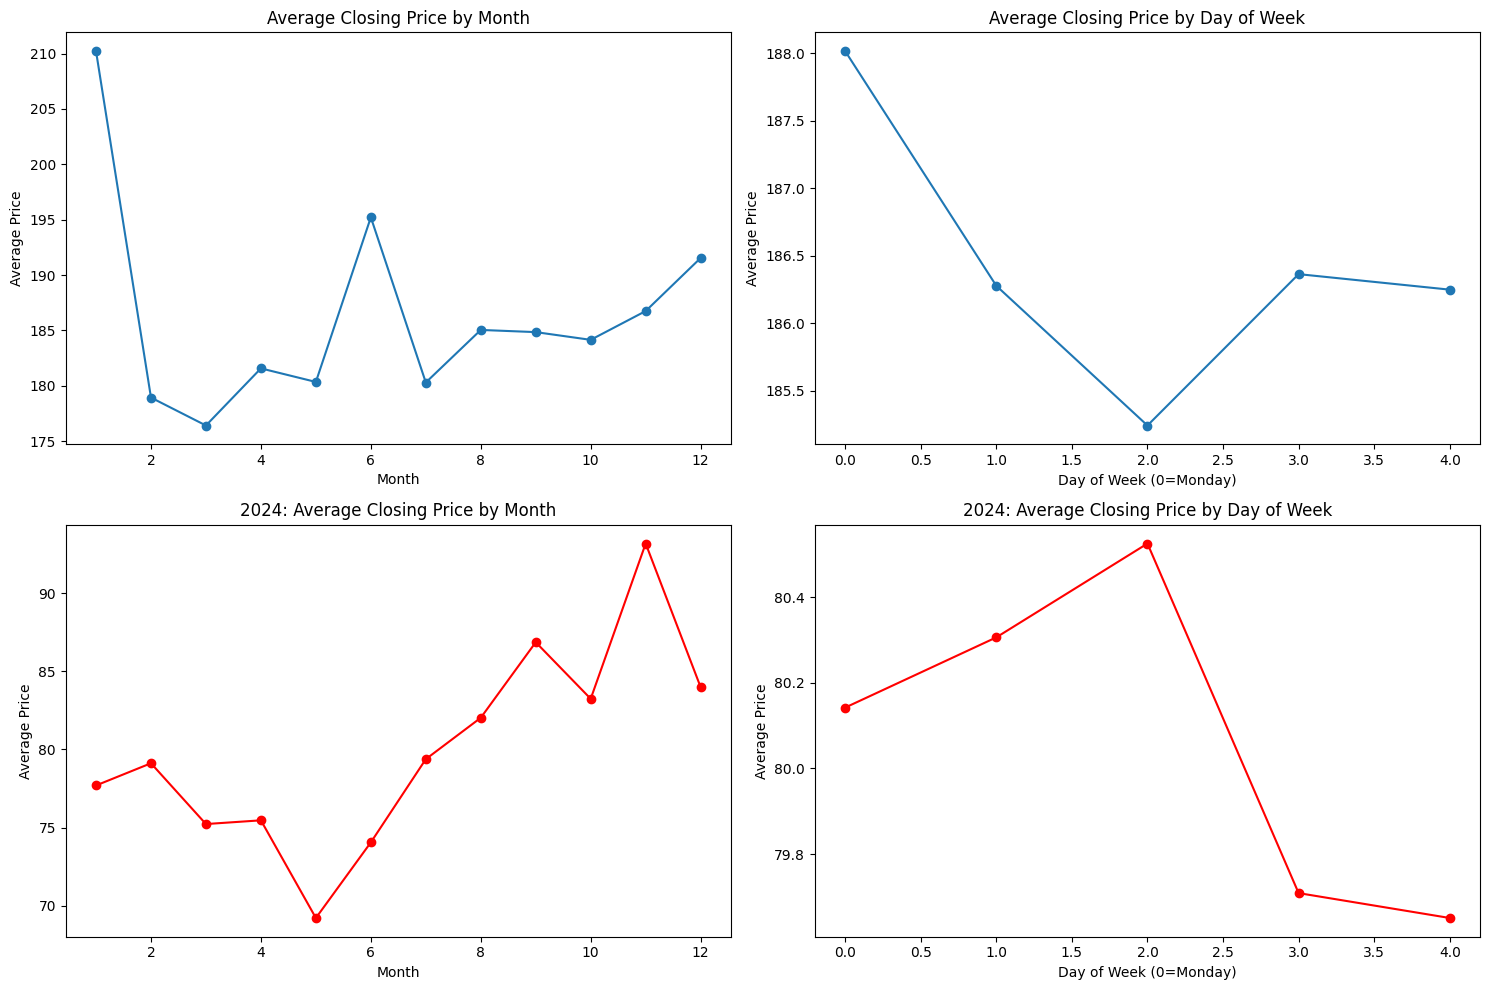

In [40]:
def compare_seasonality(old_df, new_df):
    # Extract month and day of week for pattern analysis
    old_df['Month'] = old_df['Date'].dt.month
    old_df['DayOfWeek'] = old_df['Date'].dt.dayofweek
    new_df['Month'] = new_df['Date'].dt.month
    new_df['DayOfWeek'] = new_df['Date'].dt.dayofweek

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Monthly performance comparison
    old_monthly_avg = old_df.groupby('Month')['Close'].mean()
    axes[0,0].plot(old_monthly_avg.index, old_monthly_avg.values, marker='o', label='2010-2020')
    axes[0,0].set_title('Average Closing Price by Month')
    axes[0,0].set_xlabel('Month')
    axes[0,0].set_ylabel('Average Price')

    # Day of week pattern
    old_dow_avg = old_df.groupby('DayOfWeek')['Close'].mean()
    axes[0,1].plot(old_dow_avg.index, old_dow_avg.values, marker='o', label='2010-2020')
    axes[0,1].set_title('Average Closing Price by Day of Week')
    axes[0,1].set_xlabel('Day of Week (0=Monday)')
    axes[0,1].set_ylabel('Average Price')

    # 2024 patterns
    new_monthly_avg = new_df.groupby('Month')['Close'].mean()
    axes[1,0].plot(new_monthly_avg.index, new_monthly_avg.values, marker='o', color='red', label='2024')
    axes[1,0].set_title('2024: Average Closing Price by Month')
    axes[1,0].set_xlabel('Month')
    axes[1,0].set_ylabel('Average Price')

    new_dow_avg = new_df.groupby('DayOfWeek')['Close'].mean()
    axes[1,1].plot(new_dow_avg.index, new_dow_avg.values, marker='o', color='red', label='2024')
    axes[1,1].set_title('2024: Average Closing Price by Day of Week')
    axes[1,1].set_xlabel('Day of Week (0=Monday)')
    axes[1,1].set_ylabel('Average Price')

    plt.tight_layout()
    plt.show()
compare_seasonality(old_data, new_data)

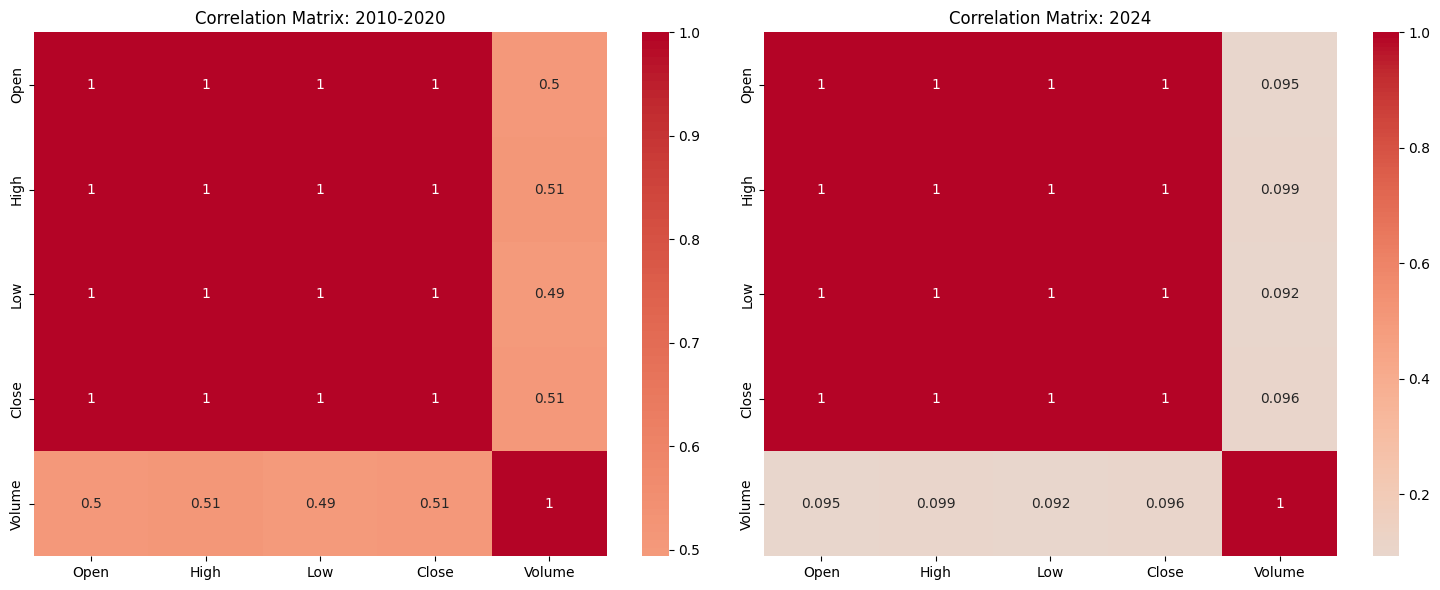

=== KEY CORRELATION CHANGES ===
Close-Volume Correlation:
2010-2020: 0.505
2024: 0.096
Change: -0.409


In [41]:
def compare_correlations(old_df, new_df):
    # Calculate correlation matrices
    old_corr = old_df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
    new_corr = new_df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Plot correlation heatmaps
    sns.heatmap(old_corr, annot=True, cmap='coolwarm', center=0, ax=ax1)
    ax1.set_title('Correlation Matrix: 2010-2020')

    sns.heatmap(new_corr, annot=True, cmap='coolwarm', center=0, ax=ax2)
    ax2.set_title('Correlation Matrix: 2024')

    plt.tight_layout()
    plt.show()

    # Compare specific correlations
    print("=== KEY CORRELATION CHANGES ===")
    print(f"Close-Volume Correlation:")
    print(f"2010-2020: {old_corr.loc['Close', 'Volume']:.3f}")
    print(f"2024: {new_corr.loc['Close', 'Volume']:.3f}")
    print(f"Change: {new_corr.loc['Close', 'Volume'] - old_corr.loc['Close', 'Volume']:+.3f}")
compare_correlations(old_data, new_data)

In [42]:
def generate_comparison_report(old_df, new_df):
    print("📊 TESLA STOCK DATASET COMPARISON REPORT")
    print("=" * 50)

    # Basic stats
    old_avg_price = old_df['Close'].mean()
    new_avg_price = new_df['Close'].mean()
    price_change_pct = ((new_avg_price - old_avg_price) / old_avg_price) * 100

    old_avg_volume = old_df['Volume'].mean()
    new_avg_volume = new_df['Volume'].mean()
    volume_change_pct = ((new_avg_volume - old_avg_volume) / old_avg_volume) * 100

    print(f"\n PRICE ANALYSIS:")
    print(f"Average Price (2010-2020): ${old_avg_price:.2f}")
    print(f"Average Price (2024): ${new_avg_price:.2f}")
    print(f"Price Change: {price_change_pct:+.2f}%")

    print(f"\n VOLUME ANALYSIS:")
    print(f"Average Volume (2010-2020): {old_avg_volume:,.0f}")
    print(f"Average Volume (2024): {new_avg_volume:,.0f}")
    print(f"Volume Change: {volume_change_pct:+.2f}%")

    print(f"\n KEY INSIGHTS:")
    if price_change_pct > 0:
        print(f"• Tesla's stock price has significantly increased in 2024")
    else:
        print(f"• Tesla's stock price has decreased in 2024")

    if volume_change_pct > 0:
        print(f"• Trading activity has increased in 2024")
    else:
        print(f"• Trading activity has decreased in 2024")
generate_comparison_report(old_data, new_data)

📊 TESLA STOCK DATASET COMPARISON REPORT

💰 PRICE ANALYSIS:
Average Price (2010-2020): $186.40
Average Price (2024): $80.07
Price Change: -57.05%

📈 VOLUME ANALYSIS:
Average Volume (2010-2020): 5,572,722
Average Volume (2024): 96,673,298
Volume Change: +1634.76%

🎯 KEY INSIGHTS:
• Tesla's stock price has decreased in 2024
• Trading activity has increased in 2024
